# Time Series vs Supervised Learning

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt

# Zadanie
Wczytaj dane "Monthly Car Sales Dataset", które pisują liczbę sprzedanych samochodów w Quebec, Kanada w latach 1960 i 1968.

In [2]:
series = Series.from_csv('monthly-car-sales-in-quebec-1960.csv', header=0)
print(series.head(5))

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Monthly car sales in Quebec 1960-1968, dtype: int64


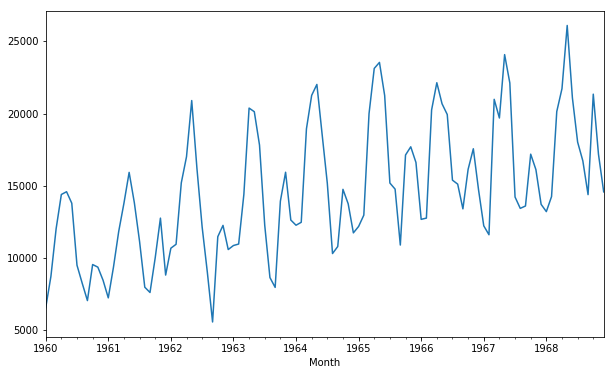

In [3]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [4]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
series.values

array([ 6550,  8728, 12026, 14395, 14587, 13791,  9498,  8251,  7049,
        9545,  9364,  8456,  7237,  9374, 11837, 13784, 15926, 13821,
       11143,  7975,  7610, 10015, 12759,  8816, 10677, 10947, 15200,
       17010, 20900, 16205, 12143,  8997,  5568, 11474, 12256, 10583,
       10862, 10965, 14405, 20379, 20128, 17816, 12268,  8642,  7962,
       13932, 15936, 12628, 12267, 12470, 18944, 21259, 22015, 18581,
       15175, 10306, 10792, 14752, 13754, 11738, 12181, 12965, 19990,
       23125, 23541, 21247, 15189, 14767, 10895, 17130, 17697, 16611,
       12674, 12760, 20249, 22135, 20677, 19933, 15388, 15113, 13401,
       16135, 17562, 14720, 12225, 11608, 20985, 19692, 24081, 22114,
       14220, 13434, 13598, 17187, 16119, 13713, 13210, 14251, 20139,
       21725, 26099, 21084, 18024, 16722, 14385, 21342, 17180, 14577],
      dtype=int64)

In [7]:
df = pd.DataFrame()
df['t'] = [x for x in series]
dataframe = series_to_supervised(df, 15)
dataframe.head()

,var1(t-15),var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
15,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926
17,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821
18,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143
19,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143.0,7975


# Zadanie
Proszę wybrać optymalną metodę regresji do powyższych danych.

In [27]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
seed=123
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=seed)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline

In [38]:
from sklearn.svm import SVR
grid_5 = GridSearchCV(SVR(kernel='rbf'),
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                               "gamma": [0.0000000001, 0.000000001,  0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
grid_5.best_estimator_

{'C': 1000, 'gamma': 1e-09}


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-09,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
from sklearn.ensemble import RandomForestRegressor

grid_6 = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features= 'sqrt', n_estimators=50, oob_score = True),
                   param_grid={
                   'n_estimators': [150, 300, 400],
                    'max_features': ['auto', 'sqrt', 'log2'],  
                    'max_depth': [ 400, 500, 600]
                   },
                    cv=kfold,
                    refit=True)
grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
grid_6.best_estimator_



{'max_depth': 400, 'max_features': 'auto', 'n_estimators': 300}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=400,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [33]:
from sklearn.neural_network import MLPRegressor

grid_7 = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',alpha=0.0001),#model powinien byc zainicjalizowany
                    param_grid={'hidden_layer_sizes': [(1000,10,10),(10,10),(100,100)],
                                'alpha': [1, 10, 100 ,1000],
                               'activation': ['identity', 'logistic', 'tanh', 'relu']                               
                               },#parametry do podstawienia
                    cv=kfold,#na ile czesci ma dzielic zbior
                    n_jobs=2,
                    refit=True)
grid_7.fit(X_train, y_train)
print(grid_7.best_params_)
grid_7.best_estimator_

{'activation': 'relu', 'alpha': 1000, 'hidden_layer_sizes': (10, 10)}


MLPRegressor(activation='relu', alpha=1000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [39]:
from sklearn import  metrics


models = []
# models.append(('ElasticNet', grid_1.best_estimator_))
# models.append(('Lasso', grid_2.best_estimator_))
# models.append(('Ridge', grid_3.best_estimator_))
# models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RFR', grid_6.best_estimator_))
models.append(('MLP_R', grid_7.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

SVR
R^2: 0.6882391694152581
Explained variance score: 0.6914906041235456
Median absolute error: 1981.3928414397906
Mean squared error: 6423198.229652523
Mean absolute errors: 2189.6723669504017
RFR
R^2: 0.788638974459547
Explained variance score: 0.7899256716904854
Median absolute error: 1597.7600000000002
Mean squared error: 4354664.3191918135
Mean absolute errors: 1741.107368421053
MLP_R
R^2: 0.4929845246070005
Explained variance score: 0.5045830168461615
Median absolute error: 1697.2179326862079
Mean squared error: 10446023.311660156
Mean absolute errors: 2453.4071143079163


In [40]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVR','RFR','MLP_R'])
df

,Method,explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2
0,SVR,0.691491,2189.672367,6.423198e+06,1981.392841,0.688239
1,RFR,0.789926,1741.107368,4.354664e+06,1597.760000,0.788639
2,MLP_R,0.504583,2453.407114,1.044602e+07,1697.217933,0.492985
